In [23]:
import xarray as xr
import os
import numpy as np
import pandas as pd

In [2]:
local_file='E:\\weatherbench\\2.8125deg\\2.8125deg\\2m_temperature\\2m_temperature_2.8125deg'

In [4]:
lats = [40.78125, 43.59375]
lons = [284.0625, 286.875]

In [73]:
def get_daily_temp_for_year(lat, lon, year):
    d = xr.open_dataset(os.path.join(local_file, "2m_temperature_"+str(year)+"_2.8125deg.nc"))
    one_slice = dict(lat=slice(lat, lat+1), lon=slice(lon, lon+1))
    data = d.loc[one_slice].to_dataframe()
    temps = data.query('lon=='+str(lon)+" and lat=="+str(lat))['t2m']
    # hourly temperature: each day covers 24 entries. Take the daily average over 24hrs
    one_year_daily=np.array([np.mean(temps[i:i+24]) for i in range(0, len(temps), 24)])
    return one_year_daily

In [ ]:
data = np.array([])
for y in range(1979, 2019):
    more_data = get_daily_temp_for_year(40.78125, 286.875, y)
    data = np.concatenate((data, more_data), axis=0)
data.shape

In [47]:
import emd
import numpy as np
d=datasub['t2m']-datasub['t2m'].mean()
d

17520   -5.637059
17521   -5.321479
17522   -5.035509
17523   -5.173589
17524   -5.074929
           ...   
26275   -7.349129
26276   -7.065009
26277   -7.295789
26278   -8.895639
26279   -8.929209
Name: t2m, Length: 8760, dtype: float64

In [48]:
imf = emd.sift.sift(np.array(d))

<AxesSubplot:xlabel='Time (samples)'>

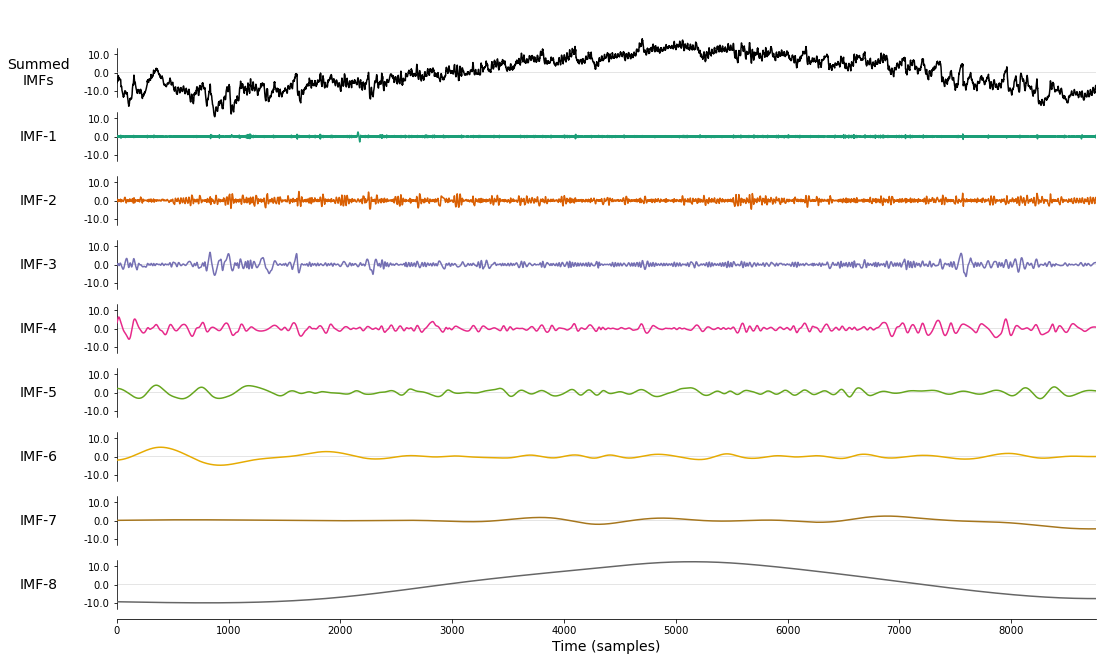

In [49]:
emd.plotting.plot_imfs(imf)

In [50]:
imf.shape

(8760, 8)

In [86]:
x=np.array([imf[i, 2] for i in range(imf.shape[0])])

In [93]:
detrend=np.array([np.sum([imf[i,j] for j,val in enumerate(imf[i]) if j!=7 and j!=2 and j!=6]) for i in range(imf.shape[0])])

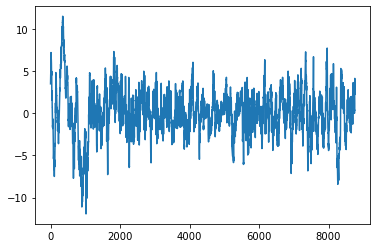

In [94]:
plt.plot(detrend)